In [22]:
#matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()
from numpy import *

nQubits = 5

Grover = QuantumCircuit(nQubits)

#GroverAlgorithm 

#Initalize
for i in range(nQubits):
    Grover.h(i)
    
for iterations in range(round(sqrt(nQubits))): #carrying out sqrt(numberQubits) Iterations of Algorithm
    #Oracle
    #depending on wich state you like to mark -> look at paper for 4 qubits (here 01111 state is marked)
    
    #for i in range(nQubits):
    Grover.x(nQubits-1)
#Grover.x(1)
    Grover.barrier()
    Grover.h(nQubits-1)
    Grover.mct(list(range(nQubits-1)),nQubits-1)
    Grover.h(nQubits-1)
    Grover.barrier()
    #for i in range(nQubits):
    Grover.x(nQubits-1)
    #Grover.x(1)

    #amplification

    Grover.barrier()
#######

    for i in range(nQubits):  #
        Grover.h(i)
    
    for i in range(nQubits):
        Grover.x(i)
    Grover.barrier()
    Grover.h(nQubits-1)                   #this and two following lines are the implementation of c..cZ-Gate as an c..cNOt Gate in Combination with 2 H-Gates
    Grover.mct(list(range(nQubits-1)),nQubits-1)
    Grover.h(nQubits-1)
    Grover.barrier()
    for i in range(nQubits):
        Grover.x(i)
    for i in range(nQubits):
        Grover.h(i)
# is it better to put oracle and amplification into extra functions for having an better overview?
Grover.draw()

┌───┐      ░                 ░       ░ ┌───┐┌───┐ ░                 ░ »
q_0: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤      ░        │        ░       ░ ├───┤├───┤ ░        │        ░ »
q_1: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤      ░        │        ░       ░ ├───┤├───┤ ░        │        ░ »
q_2: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤      ░        │        ░       ░ ├───┤├───┤ ░        │        ░ »
q_3: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■────────░─»
     ├───┤┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ »
q_4: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─»
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ »
«     ┌───┐┌───┐      ░                 ░       ░ ┌───┐┌───┐ ░                »
«q_0: ┤ X ├┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■───────»
«     ├───┤├───┤      ░        │        ░       ░ ├───┤├───┤ ░        │       »
«q_1: ┤ X ├┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■───────»
«     ├───┤├───┤      ░        │        ░       ░ ├───┤├───┤ ░        │       »
«q_2: ┤ X ├┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■───────»
«     ├───┤├───┤      ░        │        ░       ░ ├───┤├───┤ ░        │       »
«q_3: ┤ X ├┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├─░────────■───────»
«     ├───┤├───┤┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ┌───┐ ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐»
«q_4: ┤ X ├┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├»
«     └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘»
«      ░ ┌───┐┌───┐
«q_0: ─░─┤ X ├┤ H ├
«      ░ ├───┤├───┤
«q_1: ─░─┤ X ├┤ H ├
«      ░ ├───┤├───┤
«q_2: ─░─┤ X ├┤ H ├
«      ░ ├───┤├───┤
«q_3: ─░─┤ X ├┤ H ├
«      ░ ├───┤├───┤
«q_4: ─░─┤ X ├┤ H ├
«      ░ └───┘└───┘

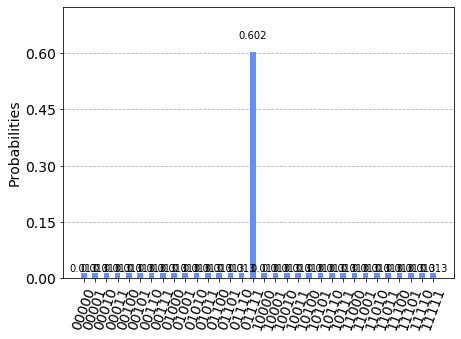

In [23]:
from qiskit.visualization import *
from math import sqrt, pi
backend = Aer.get_backend('statevector_simulator')
result = execute(Grover,backend).result()
counts = result.get_counts()
plot_histogram(counts)